### Bank Term Deposit Marketing Prediction- EDA
Predict if the client will subscribe a term deposit or not

In [1]:
# Ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import dependecies 
import numpy as np
import pandas as pd

# Ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# Read csv files
bank_additional_full_df=pd.read_csv('data/bank-additional/bank-additional-full.csv',sep=';')

#### Analysing Bank Additional Full file

In [3]:
# Columns information
bank_additional_full_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
# Check data shape
bank_additional_full_df.shape

(41188, 21)

In [5]:
# Check sample data 
bank_additional_full_df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [6]:
# Check for null values
bank_additional_full_df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
# Get df info that will give feature data types 
bank_additional_full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

#### Let's handle categorial features

In [8]:
# Get column names
bank_additional_full_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [9]:
# Dependent feature - Convert 'yes' and 'no' to numbers
y_n_lookup ={'yes' : 1, 'no' : 0}
bank_additional_full_df['y']=bank_additional_full_df['y'].map(lambda x: y_n_lookup[x])

In [10]:
# Let's look at age column
np.min(bank_additional_full_df['age']),np.mean(bank_additional_full_df['age']),np.max(bank_additional_full_df['age'])

(17, 40.02406040594348, 98)

In [11]:
# Job feature
bank_additional_full_df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [12]:
# Use find replace to rank job data -- this is really a domain knowledge area to decide the rank
job_nums = {"job": {"management": 11, "admin.": 10, "technician": 9, "blue-collar": 8, 
                          "services": 7, "entrepreneur":6,"self-employed":5, "housemaid": 4, 
                          "retired": 3, "unemployed": 2, "student":1,"unknown":0}}

# Replace df values with defined ranks
bank_additional_full_df = bank_additional_full_df.replace(job_nums)

In [13]:
# Use find replace to rank education data
education_nums = {"education": {"university.degree": 7, "professional.course": 6, "high.school": 5, 
                                "basic.9y": 4, "basic.6y": 3, "basic.4y": 2, "unknown":1,"illiterate":0 }}

# Replace df values with defined ranks
bank_additional_full_df = bank_additional_full_df.replace(education_nums)


In [14]:
# Check value count for contact types
bank_additional_full_df['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [15]:
telephone_lookup ={'cellular' : 1, 'telephone' : 0}
bank_additional_full_df['contact']=bank_additional_full_df['contact'].map(lambda x: telephone_lookup[x])

In [16]:
# Check value count for marital status
    bank_additional_full_df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [17]:
# Check value count for default
bank_additional_full_df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [18]:
# Check value count for housing status
bank_additional_full_df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [19]:
# Check value count for loan status
bank_additional_full_df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [20]:
# Check value count for poutcome status
bank_additional_full_df['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [21]:
# Get dummy columns with "marital", "default","housing","loan","contact","poutcome" 
bank_additional_full_df = pd.get_dummies(bank_additional_full_df, drop_first=True,
                          columns=["marital", "default","housing","loan","poutcome"], 
                          prefix=["marital", "default","housing","loan","poutcome"])

In [22]:
# Check value count for month status
bank_additional_full_df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [23]:
# Check value count for day_of_week status
bank_additional_full_df['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [24]:
# Get dummy variables for month
month_df = pd.get_dummies(bank_additional_full_df.month,drop_first=True,)

In [25]:
# Get dummy variables for days of week
day_of_week_df = pd.get_dummies(bank_additional_full_df.day_of_week,drop_first=True,)

In [26]:
# Concat month and days of week columns
bank_additional_full_df = pd.concat([bank_additional_full_df,month_df,day_of_week_df],axis=1)

In [27]:
# Drop month and days of week columns
bank_additional_full_df = bank_additional_full_df.drop(['month','day_of_week'] , axis='columns')

In [28]:
# Review data of rest of colums
bank_additional_full_df[['duration','campaign','pdays','previous','emp.var.rate','cons.price.idx',  'cons.conf.idx', 'euribor3m', 'nr.employed']]

duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0           261         1    999         0           1.1          93.994   
1           149         1    999         0           1.1          93.994   
2           226         1    999         0           1.1          93.994   
3           151         1    999         0           1.1          93.994   
4           307         1    999         0           1.1          93.994   
...         ...       ...    ...       ...           ...             ...   
41183       334         1    999         0          -1.1          94.767   
41184       383         1    999         0          -1.1          94.767   
41185       189         2    999         0          -1.1          94.767   
41186       442         1    999         0          -1.1          94.767   
41187       239         3    999         1          -1.1          94.767   

       cons.conf.idx  euribor3m  nr.employed  
0              -36.4      4.857       5191.0  
1              -36.4      4.857       5191.0  
2              -36.4      4.857       5191.0  
3              -36.4      4.857       5191.0  
4              -36.4      4.857       5191.0  
...              ...        ...          ...  
41183          -50.8      1.028       4963.6  
41184          -50.8      1.028       4963.6  
41185          -50.8      1.028       4963.6  
41186          -50.8      1.028       4963.6  
41187          -50.8      1.028       4963.6  

[41188 rows x 9 columns]

In [29]:
# Duration and campaign colum looks fine.
# Lets look at pdays column
bank_additional_full_df['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

In [30]:
# From 41188 records 39673 recods (96%) belogs to one category. This appears data capture issue. Let's drop this column.
bank_additional_full_df.drop('pdays', axis=1,inplace=True)

In [31]:
# Lets look at previous column : number of contacts performed before this campaign and for this client
bank_additional_full_df['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [32]:
# From 41188 records 35563 recods (86%) belogs to one category. This appears data capture issue. Let's drop this column.
bank_additional_full_df.drop('previous', axis=1,inplace=True)

In [33]:
# Let's look at emp.var.rate : employment variation rate - quarterly indicator
bank_additional_full_df['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

In [34]:
# Let's look at cons.price.idx: consumer price index - monthly indicator
bank_additional_full_df['cons.price.idx'].value_counts()

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64

In [35]:
# Data is spread within 2% and with scaling this may become ineffective but we will leave this feature as it stands

In [36]:
# Let's look at cons.conf.idx : consumer confidence index - monthly indicator
bank_additional_full_df['cons.conf.idx'].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

In [37]:
# Let's look at euribor3m: euribor 3 month rate - daily indicator
bank_additional_full_df['euribor3m'].value_counts()

4.857    2868
4.962    2613
4.963    2487
4.961    1902
4.856    1210
         ... 
1.045       1
0.956       1
0.933       1
3.282       1
0.996       1
Name: euribor3m, Length: 316, dtype: int64

In [38]:
# Let's look at nr.employed : number of employees - quarterly indicator
bank_additional_full_df['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

In [39]:
# Get sample data
bank_additional_full_df.head()

age  job  education  contact  duration  campaign  emp.var.rate  \
0   56    4          2        0       261         1           1.1   
1   57    7          5        0       149         1           1.1   
2   37    7          5        0       226         1           1.1   
3   40   10          3        0       151         1           1.1   
4   56    7          5        0       307         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  ...  jun  mar  may  nov  oct  \
0          93.994          -36.4      4.857  ...    0    0    1    0    0   
1          93.994          -36.4      4.857  ...    0    0    1    0    0   
2          93.994          -36.4      4.857  ...    0    0    1    0    0   
3          93.994          -36.4      4.857  ...    0    0    1    0    0   
4          93.994          -36.4      4.857  ...    0    0    1    0    0   

   sep  mon  thu  tue  wed  
0    0    1    0    0    0  
1    0    1    0    0    0  
2    0    1    0    0    0  
3    0    1    0    0    0  
4    0    1    0    0    0  

[5 rows x 36 columns]

In [40]:
# This is the end of review of all feature columns

In [41]:
# Get df info
bank_additional_full_df.describe()

age           job     education       contact      duration  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406      7.939934      4.985627      0.634748    258.285010   
std       10.42125      2.501071      1.809442      0.481507    259.279249   
min       17.00000      0.000000      0.000000      0.000000      0.000000   
25%       32.00000      7.000000      4.000000      0.000000    102.000000   
50%       38.00000      8.000000      5.000000      1.000000    180.000000   
75%       47.00000     10.000000      7.000000      1.000000    319.000000   
max       98.00000     11.000000      7.000000      1.000000   4918.000000   

           campaign  emp.var.rate  cons.price.idx  cons.conf.idx  \
count  41188.000000  41188.000000    41188.000000   41188.000000   
mean       2.567593      0.081886       93.575664     -40.502600   
std        2.770014      1.570960        0.578840       4.628198   
min        1.000000     -3.400000       92.201000     -50.800000   
25%        1.000000     -1.800000       93.075000     -42.700000   
50%        2.000000      1.100000       93.749000     -41.800000   
75%        3.000000      1.400000       93.994000     -36.400000   
max       56.000000      1.400000       94.767000     -26.900000   

          euribor3m  ...           jun           mar           may  \
count  41188.000000  ...  41188.000000  41188.000000  41188.000000   
mean       3.621291  ...      0.129115      0.013256      0.334296   
std        1.734447  ...      0.335332      0.114372      0.471750   
min        0.634000  ...      0.000000      0.000000      0.000000   
25%        1.344000  ...      0.000000      0.000000      0.000000   
50%        4.857000  ...      0.000000      0.000000      0.000000   
75%        4.961000  ...      0.000000      0.000000      1.000000   
max        5.045000  ...      1.000000      1.000000      1.000000   

                nov           oct           sep           mon           thu  \
count  41188.000000  41188.000000  41188.000000  41188.000000  41188.000000   
mean       0.099568      0.017432      0.013839      0.206711      0.209357   
std        0.299427      0.130877      0.116824      0.404951      0.406855   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                tue           wed  
count  41188.000000  41188.000000  
mean       0.196416      0.197485  
std        0.397292      0.398106  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000  

[8 rows x 36 columns]

#### We can see that the numerical values do not have the same scale.  Data scaling will be decided based on the algorithm. 

#### Check if dependent variable data is imbalanced data.

In [42]:
# Get count of y to understand if its unbalanced data-set
bank_additional_full_df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

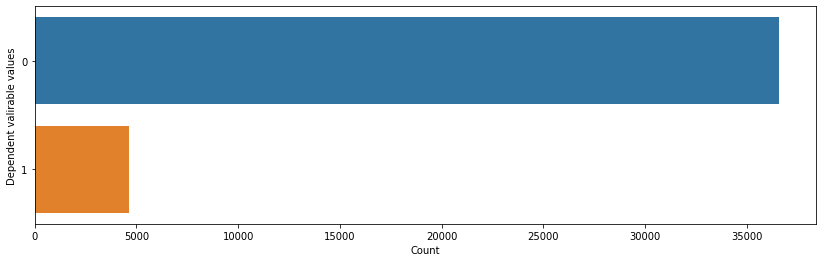

In [43]:
# Plot user device use
import seaborn as sns
f, axes = plt.subplots(figsize=(14,4))
ax = sns.countplot(y=bank_additional_full_df['y'])
plt.xlabel("Count")
plt.ylabel("Dependent valirable values")
plt.show()

### We will handle class inbalance during modelling part.

Box plot for each numeric variable will give us a clearer idea of the distribution of the input variables:

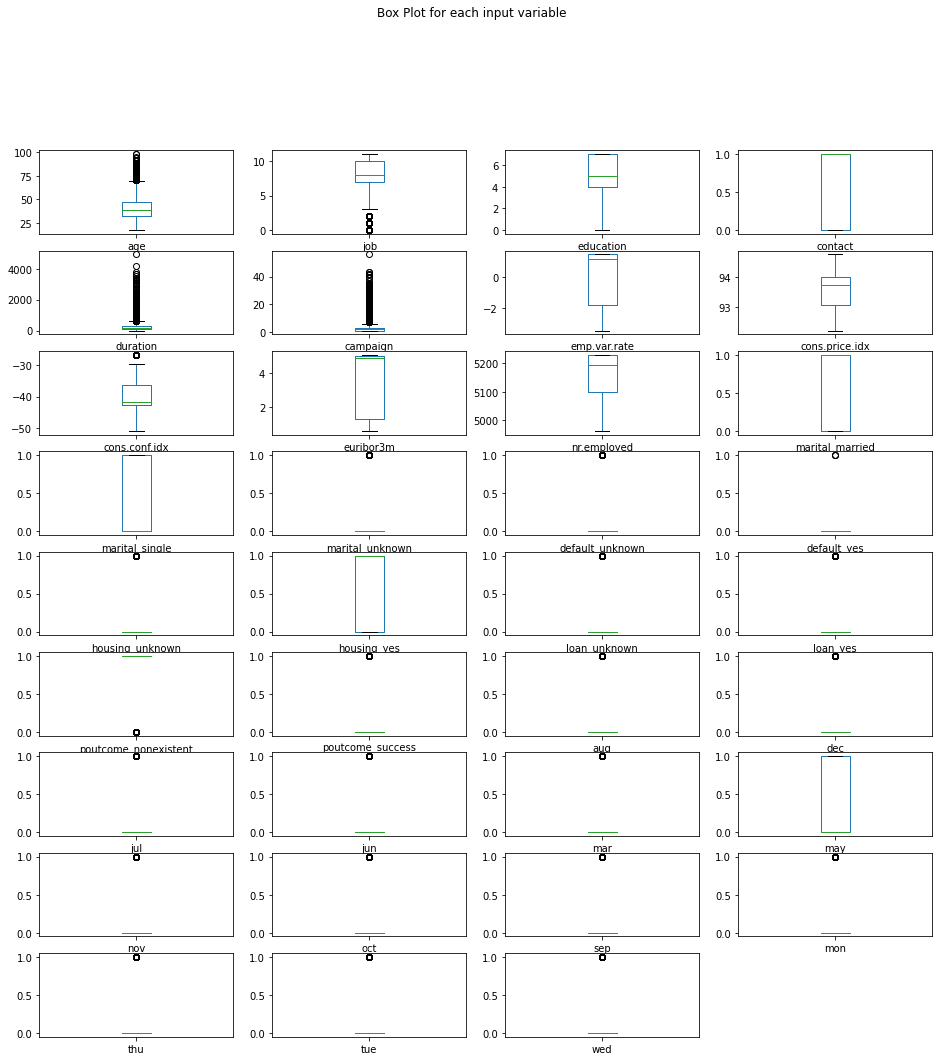

In [44]:
# 11 rowns and 4 columns 
bank_additional_full_df.drop('y', axis=1).plot(kind='box', subplots=True, layout=(11,4), 
                                               sharex=False, sharey=False, figsize=(16,20), 
                                                title='Box Plot for each input variable')
# Show plot
plt.show()

#### Let's check how predictors data is distributed.

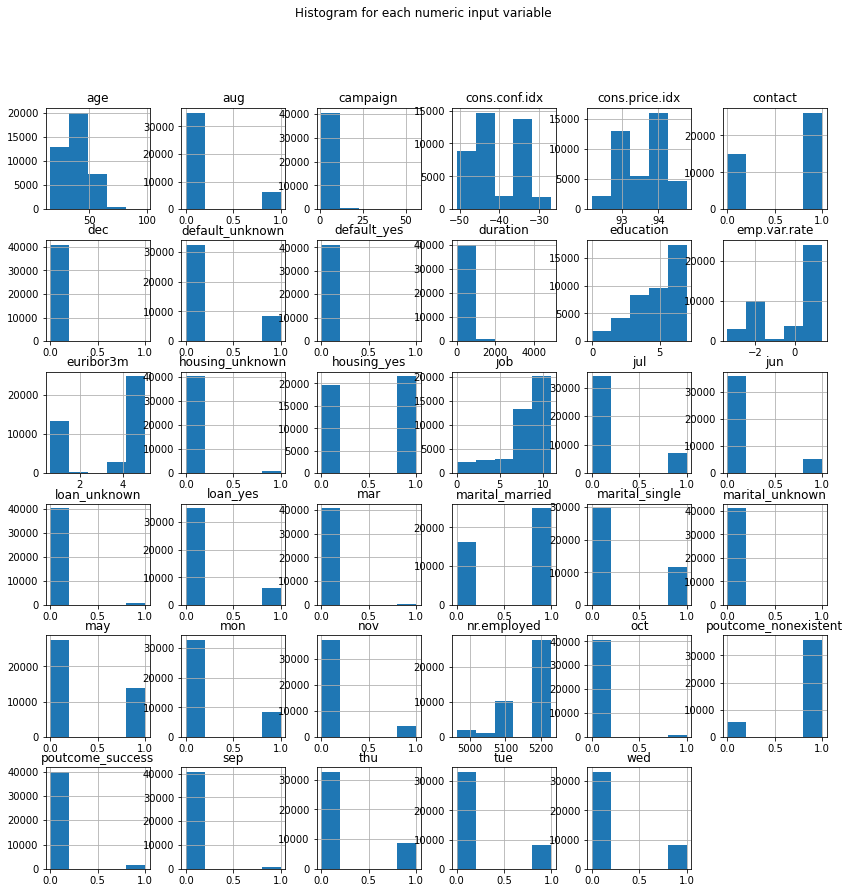

In [45]:
# Plot histogram for all predictors
bank_additional_full_df.drop('y' ,axis=1).hist(bins=5, figsize=(14,14))

# Title for the plot
plt.suptitle("Histogram for each numeric input variable")
plt.show()

Some pairs of attributes are correlated. This suggests a high correlation and a predictable relationship.

#### Feature correlation heatmap
- A great way to gain a high level view of relationships amongst the features.

<AxesSubplot:>

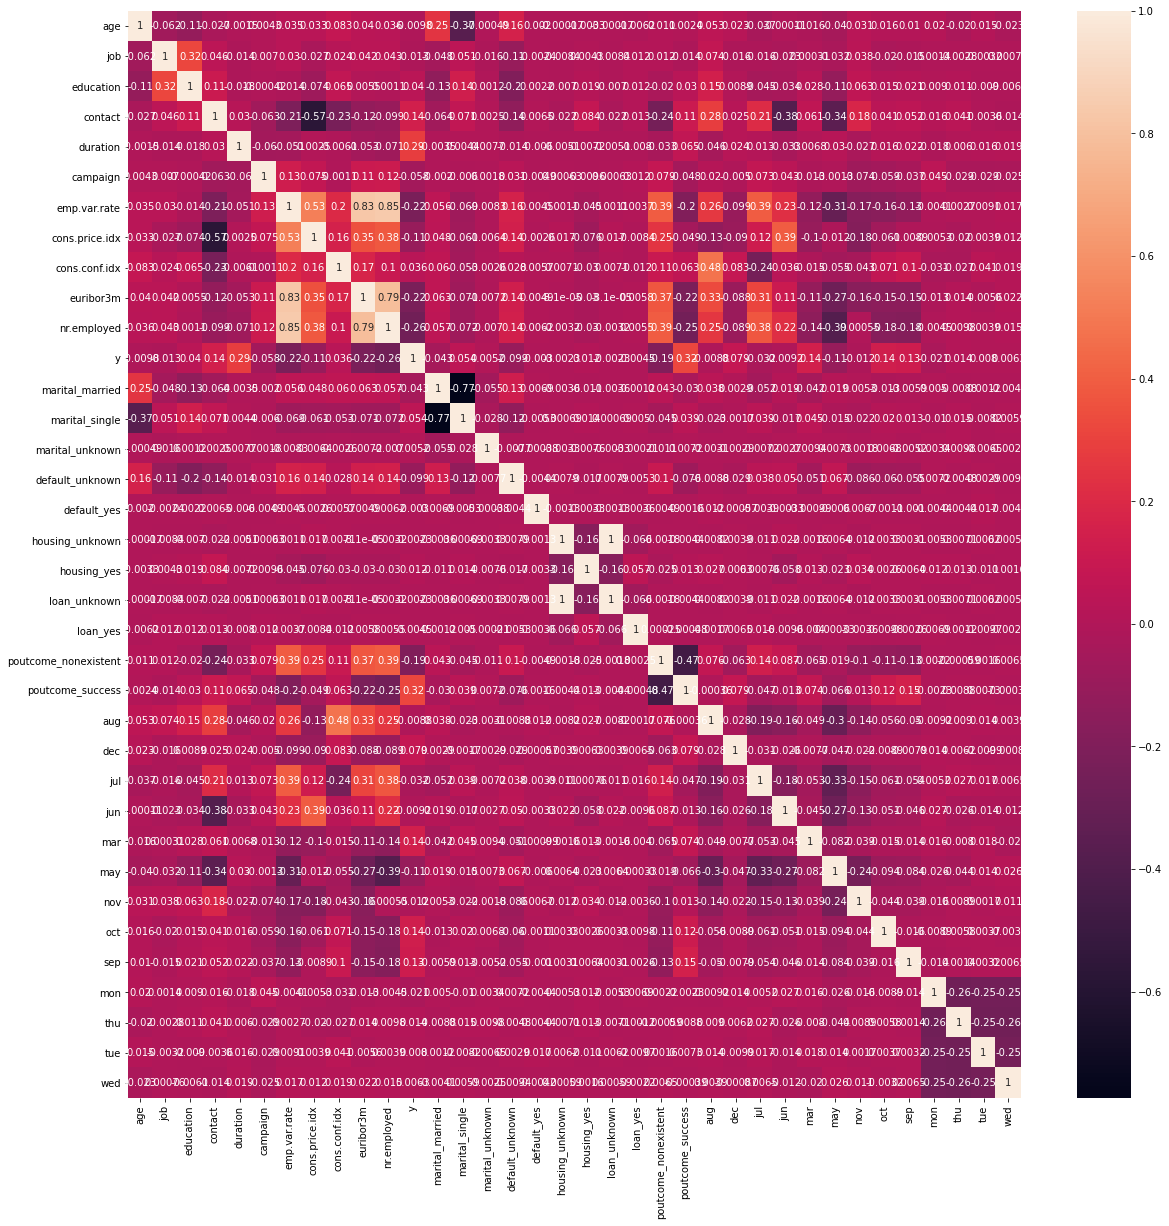

In [46]:
# Chart heatmap to see highly corrlated feature

#Get Correlation between different variables
corr = bank_additional_full_df.corr(method='kendall')
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)

- Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. 
- From heatmap, we can see emp.var.rate and nr.employed,emp.var.rate and eurobor3m, nr.employed and eurobor3m shows positive coorelation

C:\Users\anuaj\Anaconda3\envs\PythonData2020_1\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


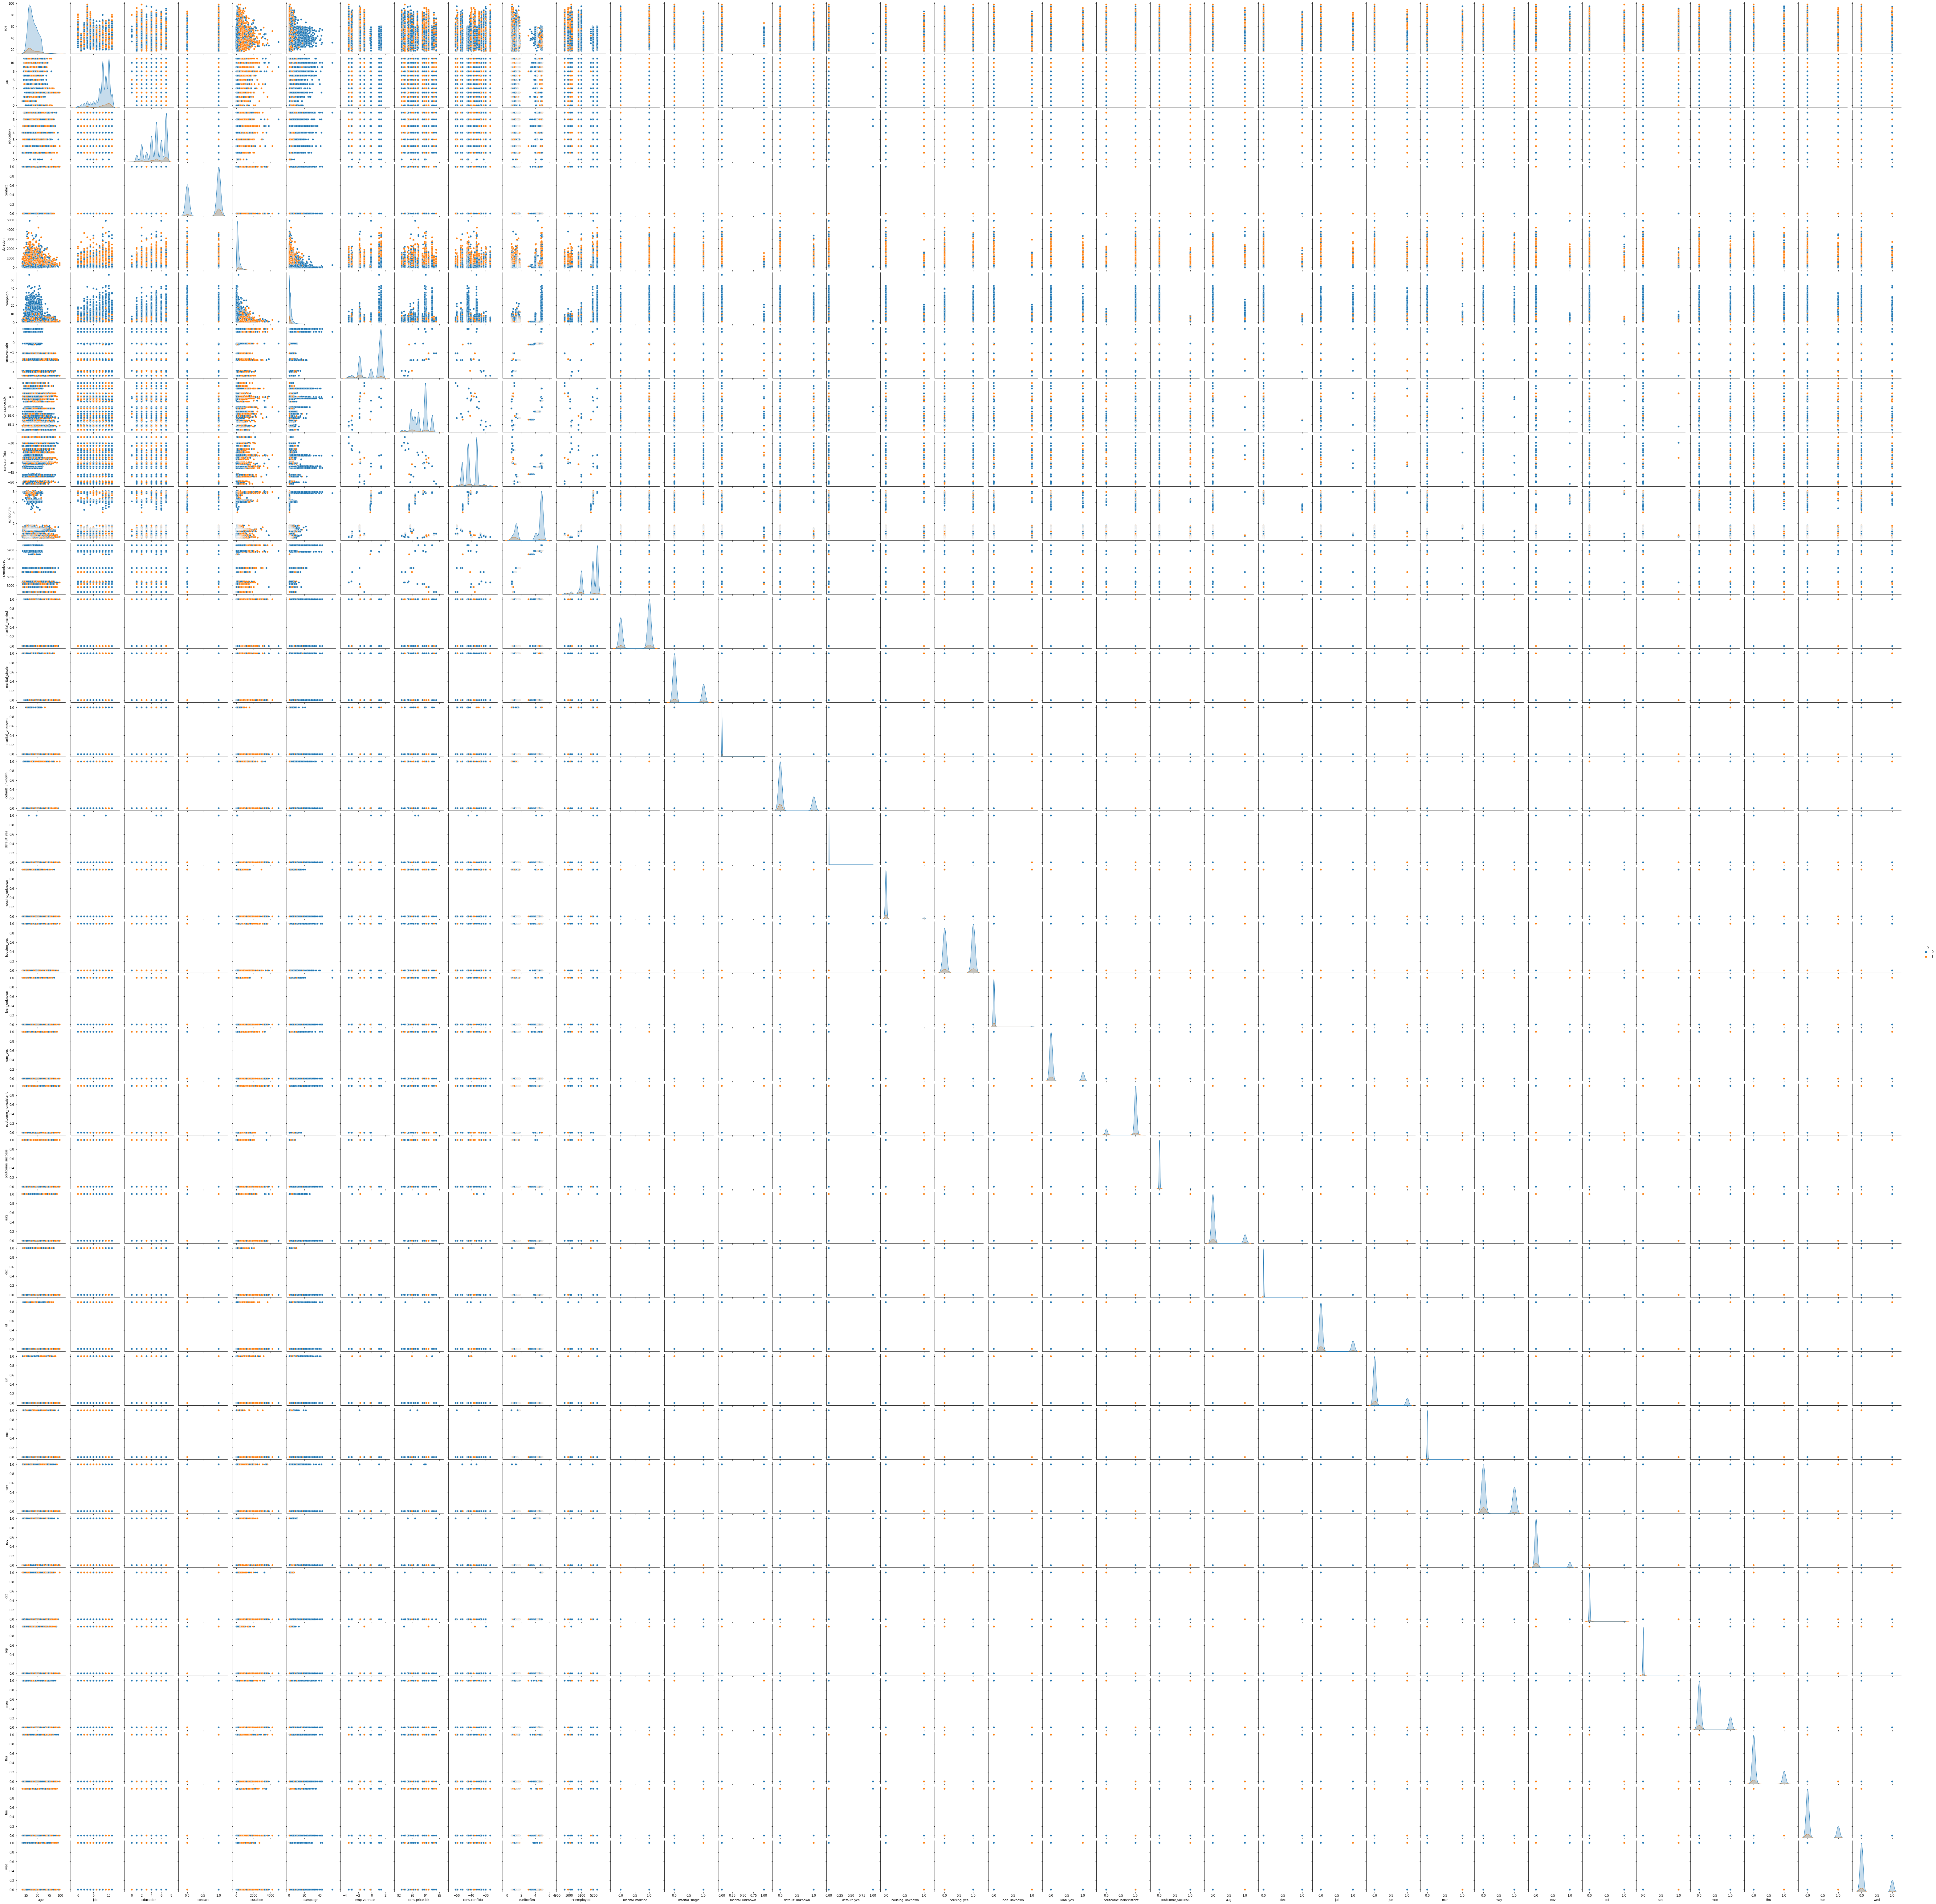

In [47]:
sns.pairplot(bank_additional_full_df,hue='y')

Pair plot gives a clear indication that the data is overlapping for most of the feature. So logistic regression will not give us a good results. We should look at KNN model first and then compare it with decision tree and random forest model. 

In [49]:
# Export data for modelling
bank_additional_full_df.to_csv (r'data/featureData/feature_dataframe.csv', index = False, header=True)